# Assignment 2-3 optional
author: Dominika Maciąg 

# Bank Dataset

In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures

bank_df = pd.read_csv('lending-club-data.csv', low_memory=False)
bank_df.loc[:,['loan_amnt', 'total_pymnt', 'grade_num', 'annual_inc', 'installment', 'int_rate', 'dti']].head(n=10)

# Lets check how our data looks like by choosing the most interesting columns and showing 10 rows of it.

,loan_amnt,total_pymnt,grade_num,annual_inc,installment,int_rate,dti
0,5000,5861.07,5,24000.0,162.87,10.65,27.65
1,2500,1008.71,4,30000.0,59.83,15.27,1.00
2,2400,3003.65,4,12252.0,84.33,15.96,8.72
3,10000,12226.30,4,49200.0,339.31,13.49,20.00
4,5000,5631.38,6,36000.0,156.46,7.90,11.20
5,3000,3938.14,2,48000.0,109.43,18.64,5.35
6,5600,646.02,1,40000.0,152.39,21.28,5.55
7,5375,1476.19,5,15000.0,121.45,12.69,18.08
8,6500,7677.52,4,72000.0,153.45,14.65,16.12
9,12000,13943.10,5,75000.0,402.54,12.69,10.78


# Exercise 1
a) Create and train simple regression model.\
b) Evaluate and visualise created model. \
c) Create and plot higher order polynomial regression models.

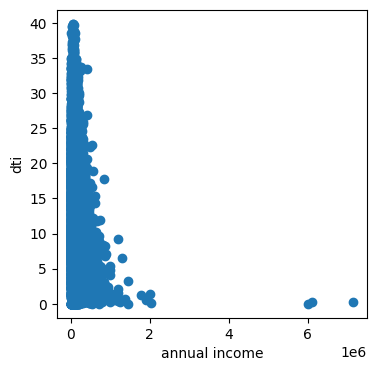

In [2]:
# firstly lets see relationship between data on scatter plot

x_axis = bank_df.loc[:,"annual_inc"]
y_axis = bank_df.loc[:,"dti"]

f = plt.figure()
f.set_figwidth(4)
f.set_figheight(4)
plt.scatter(x_axis,y_axis)
plt.xlabel("annual income")
plt.ylabel("dti")
plt.show()

## Summary:
What is DTI? Debt to income ratio demonstrates a good balance between debt and income. In other words, if your DTI ratio is 15%, that means that 15% of your monthly gross income goes to debt payments each month. 

For this bank biggest acceptable DTI is 40% 

The lower is the DTI the better finantial situation client has. As we can see more wealthy clients do not need to take loans as much as those that has worse finantial situations, that is why they have smaller DTI ratio. 

In [3]:
#a) Create and train simple regression model of annual income to DTI.

X = bank_df.annual_inc.values.reshape(-1,1)[:1000]
y = bank_df.dti.values.reshape(-1)[:1000]

# Create linear regression object
model = LinearRegression(n_jobs=1)

# Train the model using the training sets
model.fit(X,y)

LinearRegression(n_jobs=1)

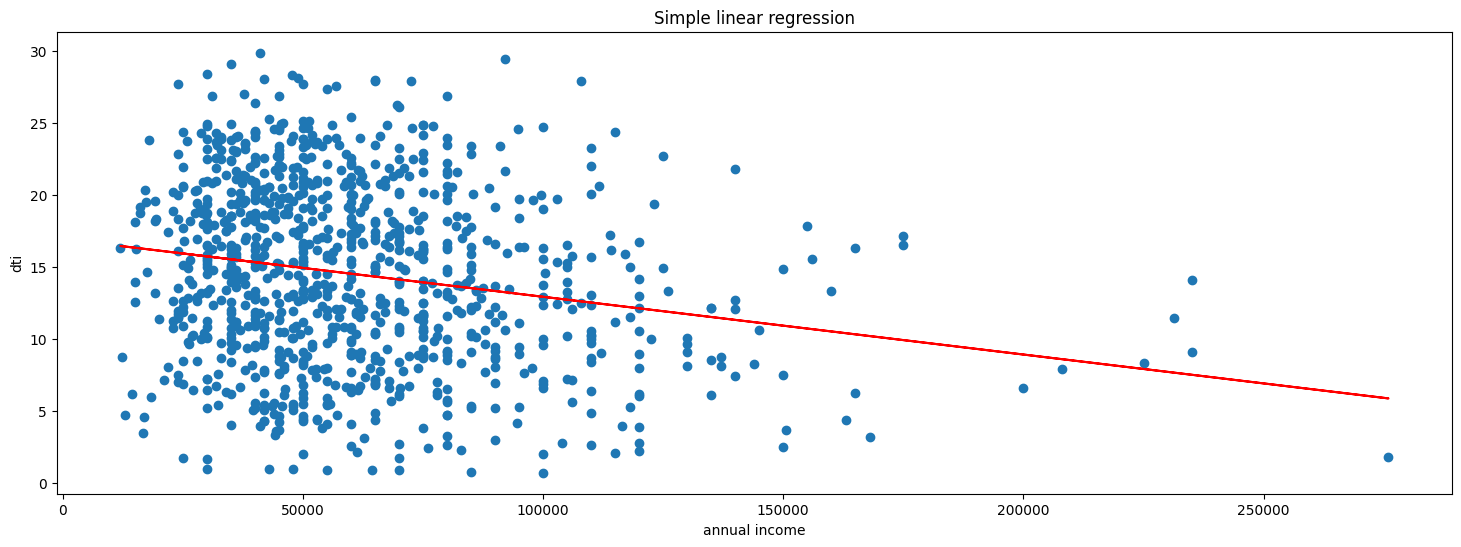

Coefficients:  [-4.00538208e-05]
Intercept:  16.928092385245435
Score:  0.04195310420001486
Mean squared error equals: 36.892395779232245


In [4]:
#b) Evaluate and visualise created model

y_pred = model.predict(X)
f = plt.figure()
f.set_figwidth(18)
f.set_figheight(6)
plt.scatter(X, y)
plt.plot(X, y_pred, color="red")
plt.ticklabel_format(style='plain') 
plt.xlabel("annual income");
plt.ylabel("dti");
plt.title("Simple linear regression")
plt.show()

print("Coefficients: ", model.coef_)
print("Intercept: ", model.intercept_)
print("Score: ", model.score(X,y))
print("Mean squared error equals:", mean_squared_error(y, y_pred))

## Summary: 
As we can observe the relationship between two variables is quite strong, we can see that the line is descending with increased income. Linear regression line shows us the estimate of y variable (in my case DTI).

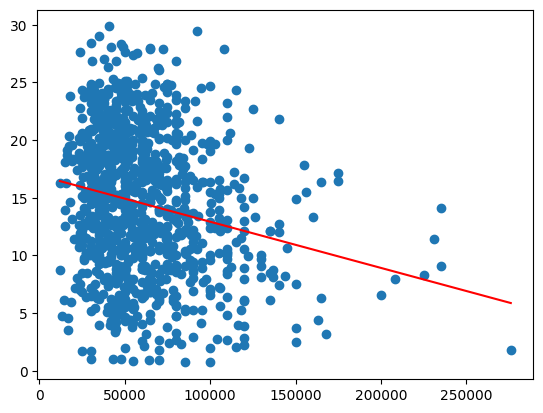

error:  36.892395779232245


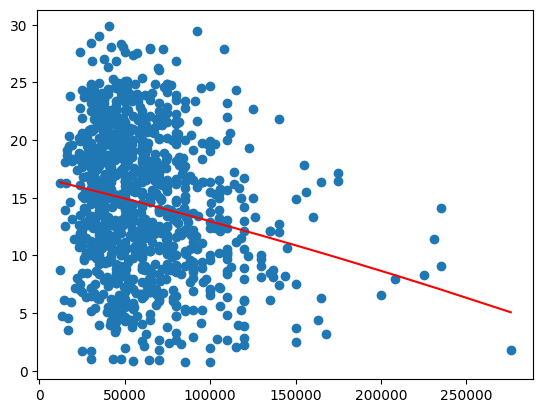

error:  36.889593842382276


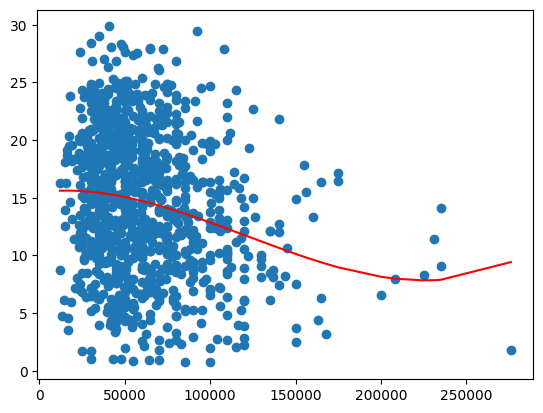

error:  36.823972250583566


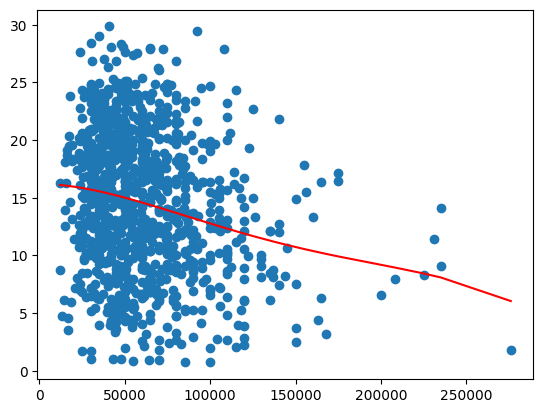

error:  36.810054485178334


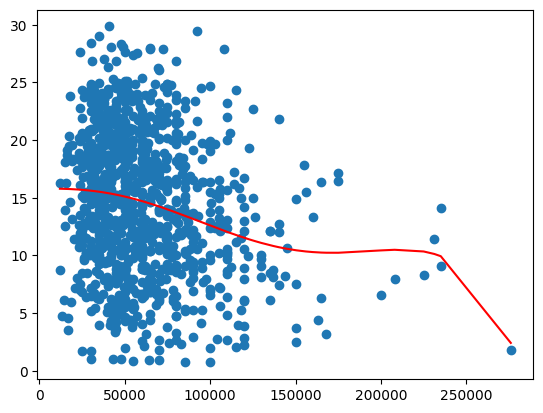

error:  36.71866875503784


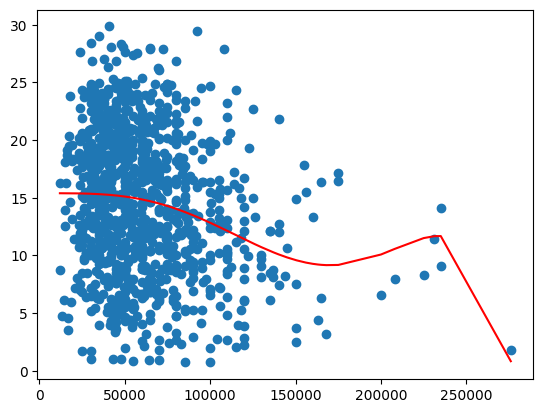

error:  36.76518002147086


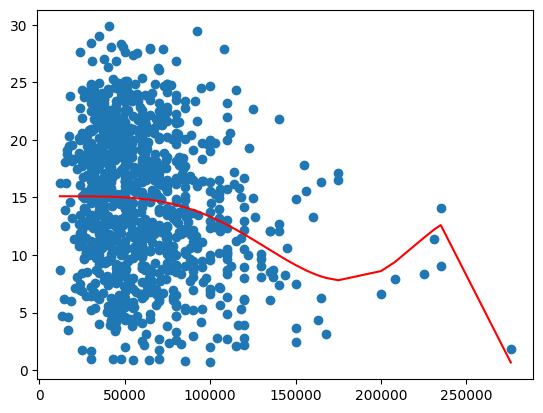

error:  36.94929186128118


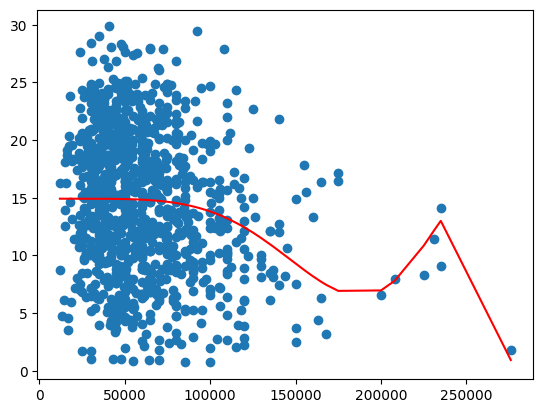

error:  37.183235727475086


In [5]:
#c) Create and plot higher order polynomial regression models.

X_sorted = X[X[:, 0].argsort()]
Y_sorted = y[X[:, 0].argsort()]
array = []

for order in range(1,9):
    poly = PolynomialFeatures(order, include_bias = False)
    X_order = poly.fit_transform(X_sorted)

    # Visualizing the Polymonial Regression results
    pol = LinearRegression()
    pol.fit(X_order, Y_sorted)
    plt.scatter(X, y)
    Y = pol.predict(poly.fit_transform(X_sorted))
    plt.plot(X_sorted,Y, color="red")
    plt.show()
    
    ##### errors #####
    pred = pol.predict(poly.fit_transform(X))
    array.insert(order, mean_squared_error(y, pred)) 
    print("error: ", mean_squared_error(y, pred))


## Summary
As we know polymonial regression is better at fitting data than linear regression. It is especially visible when we use higher order polynomial regression models. With my data the difference is not that high and for example polynomial regression of degree 8 gives bigger error than linear regression. 

## Model performance
To create plot of model performance I used array to store error values that I calculated for each degree.
There are different methods that are used to assess the quality of a regression model.
The one that I used for each degree was - MSE (Mean Squared Error). 
The lower the MSE the better.

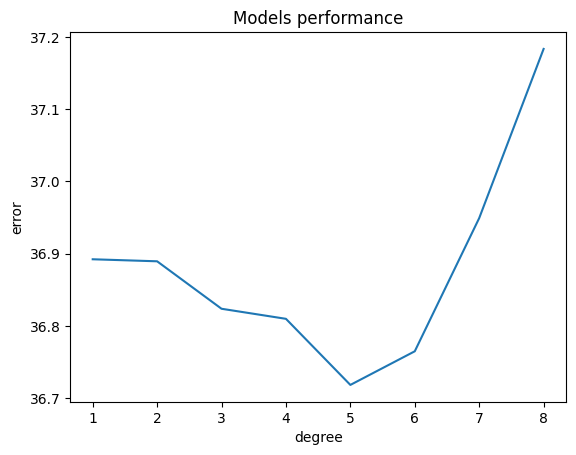

In [6]:
degree = [1,2,3,4,5,6,7,8]
plt.plot(degree,array)
plt.xlabel("degree");
plt.ylabel("error");
plt.title("Models performance")
plt.show()

## Summary:
Error is the smallest for 5th degree. Error decreased by 0.47% compared to error that gave us linear regression on data chosen by me.

# Exercise 2
In reality, we are not given the full dataset, so we need to create models which are able to handle unknown data. \
a) Split your data into training sample and test sample and repeat exercise 1 c). Plot training and test errors for all models.

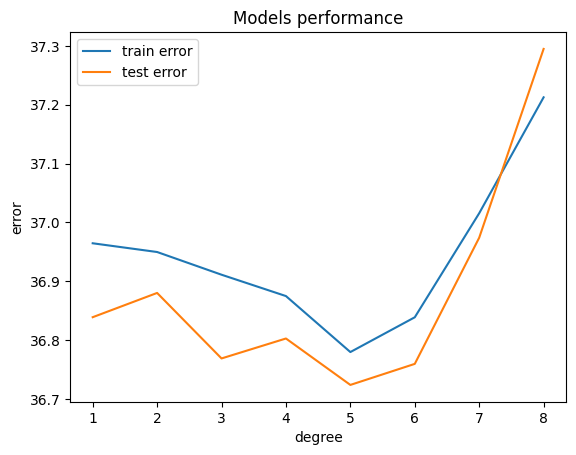

In [74]:
#a)
X = bank_df.annual_inc.values.reshape(-1,1)[:1000]
y = bank_df.dti.values.reshape(-1,1)[:1000]

array_train = []
array_test = []

for order in range(1,9):
    poly = PolynomialFeatures(order, include_bias = False)
    X_order = poly.fit_transform(X)
    
    X_train, X_test, y_train, y_test = train_test_split(X_order, y, test_size=0.3, random_state=44)
    
    pol = LinearRegression()
    pol.fit(X_train, y_train)
    
    pol2 = LinearRegression()
    pol2.fit(X_test, y_test)
    
    ##### errors #####
    pred1 = pol.predict(X_train)
    array_train.insert(order, mean_squared_error(y_train, pred1)) 
    # print("error: ", mean_squared_error(y_train, pred1))
    
    pred2 = pol.predict(X_test)
    array_test.insert(order, mean_squared_error(y_test, pred2)) 
    # print("error2: ", mean_squared_error(y_test, pred2))

plt.plot(degree,array_train, label="train error")
plt.plot(degree,array_test, label="test error")
plt.xlabel("degree");
plt.ylabel("error");
plt.title("Models performance")
plt.legend()
plt.show()

## Summary
After we separated data to test data and trained data we can compare their errors on the chart displayed above. To my suprise with dataset of my choice test error is slightly better compared with train error.

# Excercise 3
a) Train model to predict age for a given number of products. Plot predictions. \
b) Apply more features and propose better model for predicting the age. Try to beat proposed one.

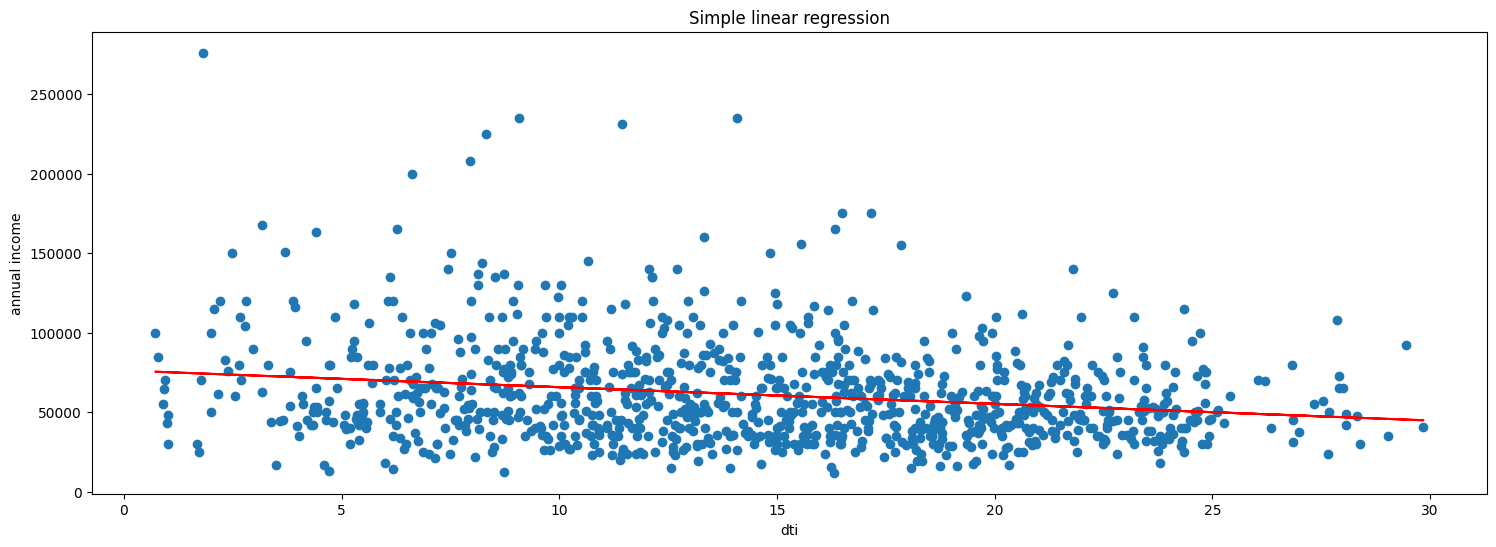

Coefficients:  [-1047.41828397]
Intercept:  76233.58802054495
Score:  0.04195310420001508
Mean squared error equals: 964746162.8402454


In [40]:
#a)

X = bank_df.dti.values.reshape(-1,1)[:1000]
y = bank_df.annual_inc.values.reshape(-1)[:1000]

# Create linear regression object
model = LinearRegression(n_jobs=1)

# Train the model using the training sets
model.fit(X,y)
y_pred = model.predict(X)

f = plt.figure()
f.set_figwidth(18)
f.set_figheight(6)
plt.scatter(X, y)
plt.plot(X, y_pred, color="red")
plt.ticklabel_format(style='plain') 
plt.xlabel("dti");
plt.ylabel("annual income");
plt.title("Simple linear regression")
plt.show()

print("Coefficients: ", model.coef_)
print("Intercept: ", model.intercept_)
print("Score: ", model.score(X,y))
print("Mean squared error equals:", mean_squared_error(y, y_pred))

In [9]:
#b) Let's propose model, which uses annual_inc, loan_amnt, total_pymnt, installment and all of their interactions up to third degree
import math
X = bank_df[['annual_inc', 'loan_amnt', 'total_pymnt', 'int_rate']].values.reshape(-1,4)
y = bank_df.dti.values.reshape(-1)

for i in range (len(X)):
    for j in range(4):
        if(math.isnan(X[i][j])):
#             print(X[i])
#             print(i)
            X[i] = [0,0,0,0] # There is some data missing and that is why I change it to zeros

poly = PolynomialFeatures(3, include_bias = False)
X = poly.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=43)
    
model = LinearRegression() 
_= model.fit(X_train, y_train) 

y_pred = model.predict(X_test)
print("Mean squared error equals: {0}".format(mean_squared_error(y_pred, y_test)))

Mean squared error equals: 54.783872118656696


In [10]:
#  Method that I propose for my data is to use trained data for the predictions and for calculation of MSE 

X = bank_df[['annual_inc', 'loan_amnt', 'total_pymnt', 'int_rate']].values.reshape(-1,4)
y = bank_df.dti.values.reshape(-1)

for i in range (len(X)):
    for j in range(4):
        if(math.isnan(X[i][j])):
#             print(X[i])
#             print(i)
            X[i] = [0,0,0,0] # There is some data missing and that is why I change it to zeros

poly = PolynomialFeatures(3, include_bias = False)
X = poly.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=43)
    
model = LinearRegression() 
_= model.fit(X_train, y_train) 

y_pred = model.predict(X_train) 
print("Mean squared error equals: {0}".format(mean_squared_error(y_train, y_pred)))

Mean squared error equals: 50.85584832760982


## Summary:
The error decreased by 7.17004% by using trained data for the predictions. 

# Assignment 3 with my dataset

## 1. Linear Regression. A bit of formalism
Let's have a data consisting of $n$ samples. These samples are $(m+1)$ - dimensional vectors, where first $m$ dimensions are called features (explanatory variables) and will be used to predict the last dimension which is called regressand (dependent variable). 

We will have therefore a $n \times m$ matrix **$X$** (called feature matrix) and vector **$y$** of lenght $n$. 

In our simple example, age is a feature, products number is regressand and the data consists of $100$ samples. It forms $100 \times 1$ feature matrix **$X$** and vector **$y$** of length $100$.

In [41]:
X = bank_df.annual_inc.values.reshape(-1,1)[:100]
y = bank_df.dti.values.reshape(-1)[:100]
print(np.shape(X))
print(np.shape(y))

(100, 1)
(100,)


# Exercise 1
a) Create functions predict(b, X) and cost(y_pred, y_true). All inputs should be numpy arrays (take care of dimension scalability!) \
b) For our data X,y, plot cost as the function of b (which is one dimensional vector). Plot the line with best slope among evaluated with cost function.

In [42]:
#a)
def predict(b, X):
    # return matrix multiplication
    return np.matmul(X,b)

def cost(y_pred, y_true):
    # mean squared error without sklearn using only numpy
    subY = y_pred - y_true
    absY = abs(subY)
    powY = pow(absY,2)
    return powY.mean()



#short test:
test_b = np.array([[1],[1],[1]])
test_X = np.array([[1,2,3],[2,5,4],[3,4,5],[4,5,7]])
test_y = np.array([[1],[2],[3],[4]])

print(predict(test_b, test_X))
print(cost(predict(test_b, test_X),test_y))

[[ 6]
 [11]
 [12]
 [16]]
82.75


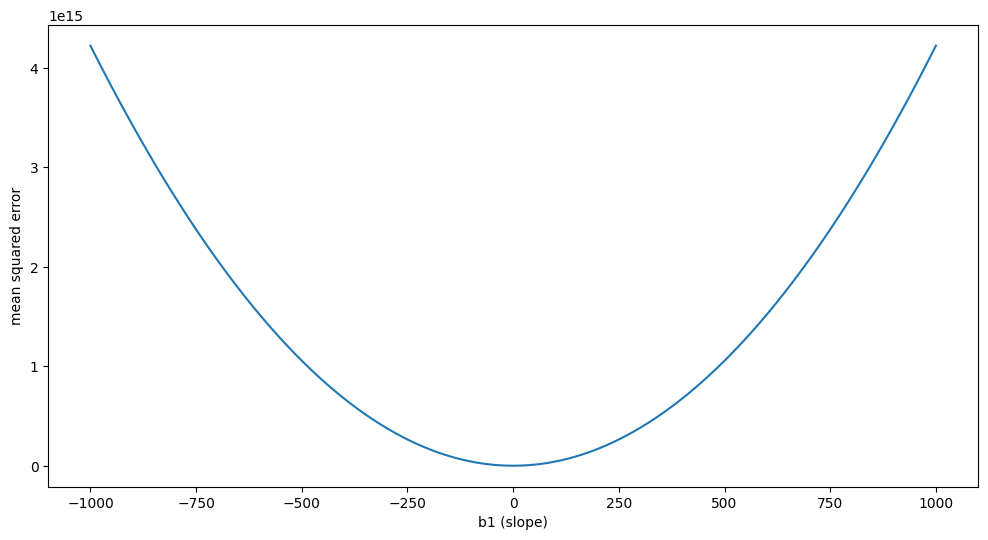

In [26]:
#b)
b1 = list(range(-1000, 1001))
b1_re = np.array(b1).reshape(-1,1)
mse = []*2001

for i in range (2001):
    mse.append(cost(predict(b1_re[i],X),y))
    
# print(mse)
# print("\n")
# print(b1)
f = plt.figure()
f.set_figwidth(12)
f.set_figheight(6)
plt.xlabel("b1 (slope)");
plt.ylabel("mean squared error");
plt.plot(b1,mse)

0.00019304030185227376


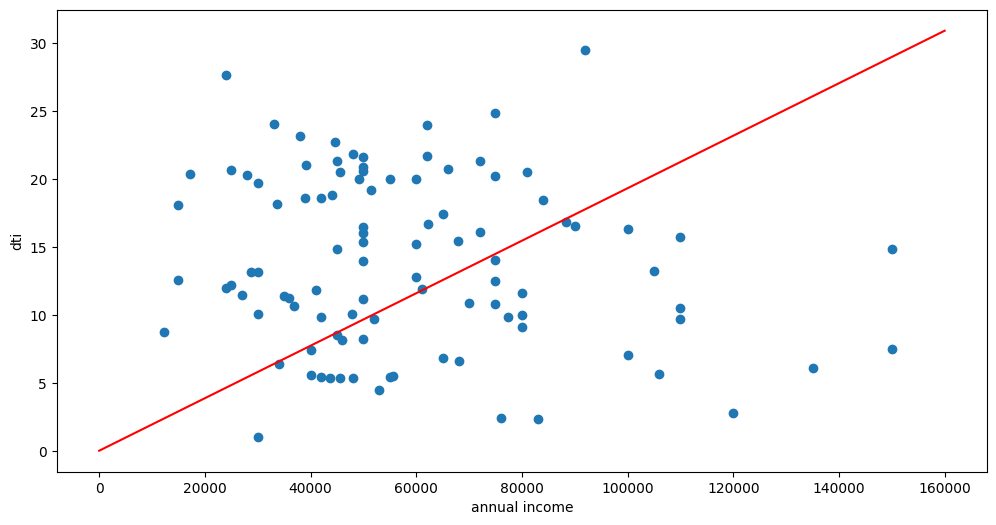

In [43]:
import math
min_er = cost(predict([[0]], X),y)
dokladnosc = 10000
min_b = 0

for i in range (dokladnosc):
    b = math.tan((math.pi*i) / (2*dokladnosc))*0.001
    if cost(predict([[b]], X),y)<min_er:
        min_er = cost(predict([[b]], X),y)
        min_b = b
f = plt.figure()
f.set_figwidth(12)
f.set_figheight(6)
plt.xlabel("annual income");
plt.ylabel("dti");
plt.scatter(X, y)
plt.plot([0,160000], [0,160000*min_b],color="red")

print(min_b)

## Summary:
Firstly we created function that predicts value of y by calculating multiplication of X (matrix that contains sqft_living data) and vector b (since X have only one column b must have one dimension).

Cost function allows us to find minimum of mean squared error.
On the plot in b) which shows how b affects cost function, we can observe that the min MSE is where b has value that is approximately equal to zero.

## Exercise 2
a) Add bias column to the **$X$** matrix.  
b) Make the code below compatible with functions that you've created so far.

In [44]:
#a) 
X = bank_df.annual_inc.values.reshape(-1,1)[:100]
y = bank_df.dti.values.reshape(-1)[:100]
X = np.c_[X,np.ones((100,1))]
X_oryginal = bank_df.annual_inc.values.reshape(-1,1)[:100]
# print(X)

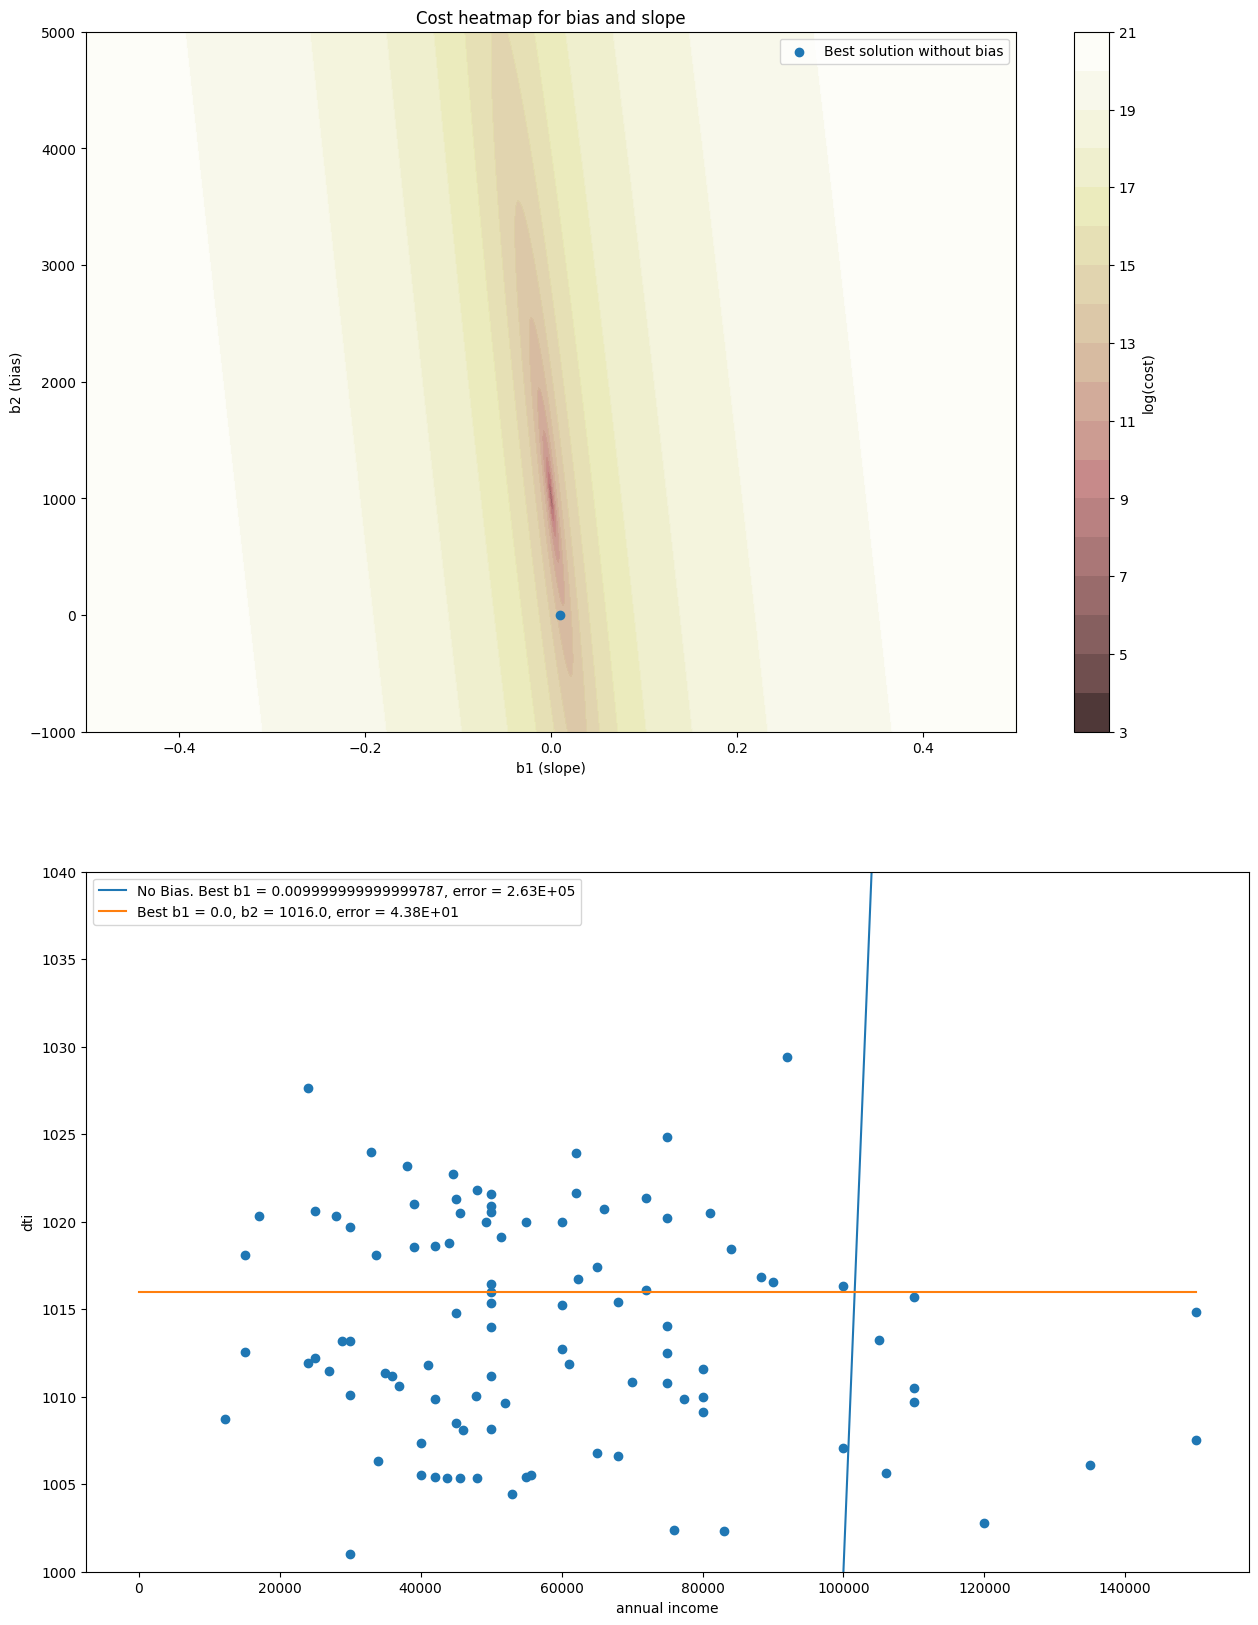

In [48]:
y_shifted = y+1e3

# #No Bias Part
# print(X[:,0].reshape(-1,1))
b_arr = [b1 for b1 in np.linspace(-5, 5, num=1001)]
cost_arr = [cost(predict([b], X[:,0].reshape(-1,1)), y_shifted) for b in b_arr]
best_b1 = b_arr[np.argmin(cost_arr)]

#Bias Part
nb_of_bs = 1001 # compute the cost nb_of_bs times in each dimension
b1 = np.linspace( -0.5, 0.5, num=nb_of_bs) # slope coefficient
b2 = np.linspace(-1e3, 5e3, num=nb_of_bs) # bias
b_x, b_y = np.meshgrid(b1, b2) # generate grid
cost_arr_2d = np.zeros((nb_of_bs, nb_of_bs)) # initialize cost matrix
# Fill the cost matrix for each combination of coefficients
for i in range(nb_of_bs):
    for j in range(nb_of_bs):
        cost_arr_2d[i,j] = cost(predict(np.array([[b_x[i,j]], [b_y[i,j]]]), X) , y_shifted)
#         print("---", np.array([[b_x[i,j]], [b_y[i,j]]]))
#         print("-----", X)


plt.figure(figsize=(15,20)) 
        
plt.subplot(2,1,1)
plt.title("Cost heatmap for bias and slope")

plt.contourf(b_x, b_y, np.log(cost_arr_2d), 20, alpha=0.9, cmap=cm.pink)
cbar = plt.colorbar()
plt.scatter(best_b1, 0, label = "Best solution without bias")
cbar.ax.set_ylabel('log(cost)')
plt.xlabel("b1 (slope)")
plt.ylabel("b2 (bias)")
plt.legend()

plt.subplot(2,1,2)

plt.ylim(1e3, 1e3+40)
plt.scatter(X_oryginal.T[0], y_shifted)
plt.xlabel("annual income")
plt.ylabel("dti")

# print("--", X_oryginal)
# print("---", X_oryginal.T[0])

x_model = np.linspace(np.min(X), np.max(X), 1000)
y_model = best_b1*x_model
plt.plot(x_model, y_model, label='No Bias. Best b1 = {}, error = {:.2E}'.format(best_b1, cost_arr[np.argmin(cost_arr)]))

best_b1_2d_ind, best_b2_2d_ind = np.unravel_index(cost_arr_2d.argmin(), cost_arr_2d.shape)
best_b1 = b_x[best_b1_2d_ind,best_b2_2d_ind]
best_b2 = b_y[best_b1_2d_ind,best_b2_2d_ind]

y_model = best_b1*x_model + best_b2
plt.plot(x_model, y_model, label='Best b1 = {}, b2 = {}, error = {:.2E}'.format(best_b1, best_b2, cost_arr_2d[best_b1_2d_ind,best_b2_2d_ind]))

plt.legend()

plt.show()

# Summary: 
Adding additional bias column to X matrix drastically improved results, worth noting is that achieving these results in sensible timespan requires us to either manually set range of b or use some other quicker algorithm (maybe something similar to binary search would work but I am not sure whether this method would converge to optimal solution). Depending on our nb_of_bs size our soulution varies a lot (I have seen both b=-0.0002, b=0.0002, and everything in between). This shows that one must be carefull choosing lower amount of nb_of_bs in order to save time.

# 3. Standardization

In order to improve performance of many machine learning algorithms, the value standardization is applied. It makes the values of each feature in the data have zero-mean and unit-variance. It is achieved by substracting from each value $x$ the overall mean $\bar{x}$, and then dividing it by feature's standard deviation ${\sigma}$:

$$x' = \frac{x - \bar{x}}{\sigma}. $$

It is important to remember, that bias column should not be standardize!

## Exercise 3
a) Implement function standardize(), which standardize the feature matrix and returns it together with two vectors containing original features' means and standard deviations.  
b) Implement function destandardize(), which restores the original data given standardized feature matrix X and vectors containing original features' means and standard deviations.  
c) Plot original $X,y$ data. Then plot it after standardization. Then plot it after destandardisation.

In [49]:
# a)
X = bank_df.annual_inc.values.reshape(-1,1)[:1000]
y = bank_df.dti.values.reshape(-1)[:1000]

def standardize(X):
    return ((X-np.mean(X,axis=0))/np.std(X,axis=0))

def standardize2(X):
    tab = [ ((X-np.mean(X,axis=0))/np.std(X,axis=0))  ,  np.mean(X,axis=0)  , np.std(X,axis=0)]
    return tab

# b)
def destandardize(X, means, sds):
    return (X * sds)+means

#short test:
W = [[1,2,3],[2,5,4],[3,4,5],[4,5,7]]
standardize2(W)


[array([[-1.34164079, -1.63299316, -1.18321596],
        [-0.4472136 ,  0.81649658, -0.50709255],
        [ 0.4472136 ,  0.        ,  0.16903085],
        [ 1.34164079,  0.81649658,  1.52127766]]),
 array([2.5 , 4.  , 4.75]),
 array([1.11803399, 1.22474487, 1.47901995])]

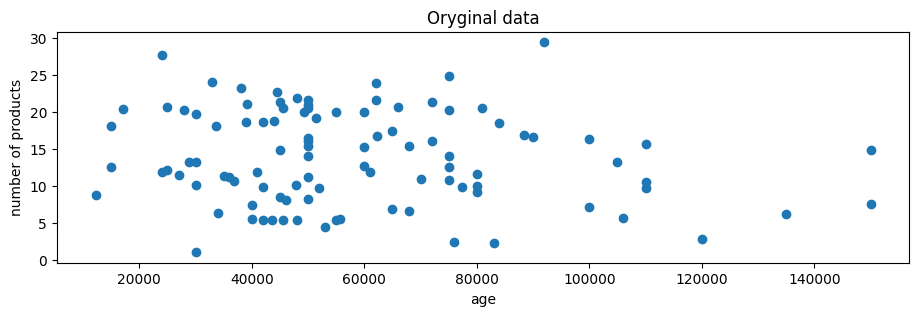

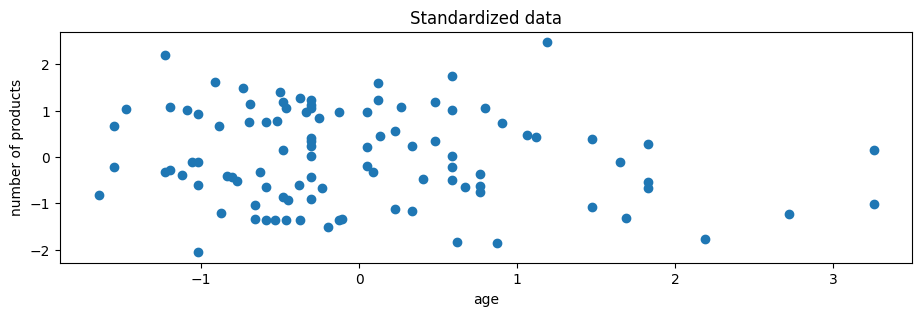

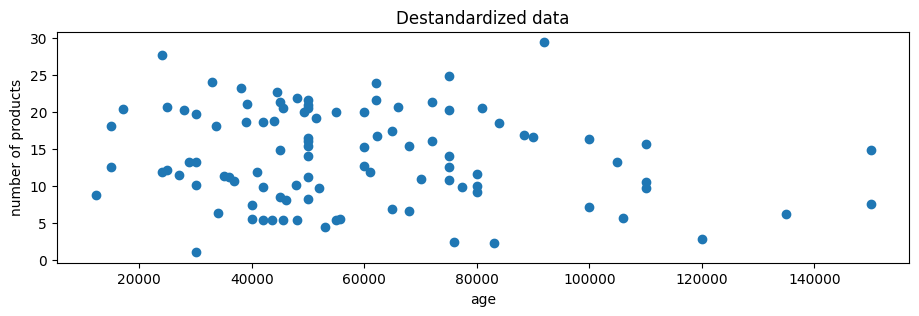

In [53]:
# c) Plot original  𝑋,𝑦  data. Then plot it after standardization. Then plot it after destandardisation.
X = bank_df.annual_inc.values.reshape(-1,1)[:100]
y = bank_df.dti.values.reshape(-1,1)[:100]

# oryginal data
f = plt.figure()
f.set_figwidth(11)
f.set_figheight(3)
plt.xlabel("age");
plt.ylabel("number of products");
plt.title("Oryginal data")
plt.scatter(X, y)

# standardized data
X_st = standardize(X[:,0])
y_st = standardize(y[:,0])
f = plt.figure()
f.set_figwidth(11)
f.set_figheight(3)
plt.xlabel("age");
plt.ylabel("number of products");
plt.title("Standardized data")
plt.scatter(X_st, y_st)

# destandardized data
y_mean = np.mean(y, axis=1)
y_sds = np.std(y, axis=1)
f = plt.figure()
f.set_figwidth(11)
f.set_figheight(3)
plt.xlabel("age");
plt.ylabel("number of products");
plt.title("Destandardized data")
plt.scatter(X[:,0], destandardize(y_st,y_mean,y_sds))

## Summary:
Standardization is a method where we standardize our data, to do that we calculate the mean and standard deviation. Then for each value we substract the mean and divide by the standard deviation. Standardization is often used to avoid errors. We can observe that after standardization our points are centered so that line crossing point (0,0) is no longer the problem. The example shows that after we standardized orginal data and then destandardized it we managed to restore the oryginal data.

## Exercise 4
a) Create functions: *gradient()* which computes gradient for linear regresion and *gradient_descent_step()* which returns new vector **b** being the result of one GDM step.  

b) Take **$X$** consisting of *age* together with bias column. Set **$y$** as price. Standardize both **$X$** (without bias) and **$y$**. Plot a heatmap showing dependence of cost function's value on vector **$b$**. Mark first 5 steps of gradient descent with *learning rate* = $0.2$, starting from **$b =  \begin{bmatrix} 3 \\ 2 \end{bmatrix}$**. Experiment with other *learning rates*.  

c) Take **$X$** consisting of *age* and *balance*. Set **$y$** as price. Standardize both **$X$** and **$y$**. Plot a heatmap showing dependence of cost function's value on vector **$b$**. Mark first 5 steps of gradient descent with *learning rate* = $0.2$, starting from **$b =  \begin{bmatrix} 3 \\ 1 \end{bmatrix}$**. Experiment with other *learning rates*.  

d) Try to redo above points without standarization. How can you explain such results?


In [54]:
# a)

def gradient(b, X, y):
    subxb = np.matmul(X,b)
    sub = np.matmul((2*(X.transpose())), (subxb-y))
    return sub / len(y)

def gradient_descent_step(b, X, y, lr):
    return b - gradient(b,X,y)*lr

#short test:
test_b = np.array([[1],[1],[1]])
test_X = np.array([[1,2,3],[2,5,4],[3,4,5],[4,5,7]])
test_y = np.array([[1],[2],[3],[4]])

print(gradient(test_b, test_X, test_y))
print(gradient_descent_step(test_b, test_X, test_y, 0.1))

[[49. ]
 [75.5]
 [90. ]]
[[-3.9 ]
 [-6.55]
 [-8.  ]]


0.25426833408081034
0.0


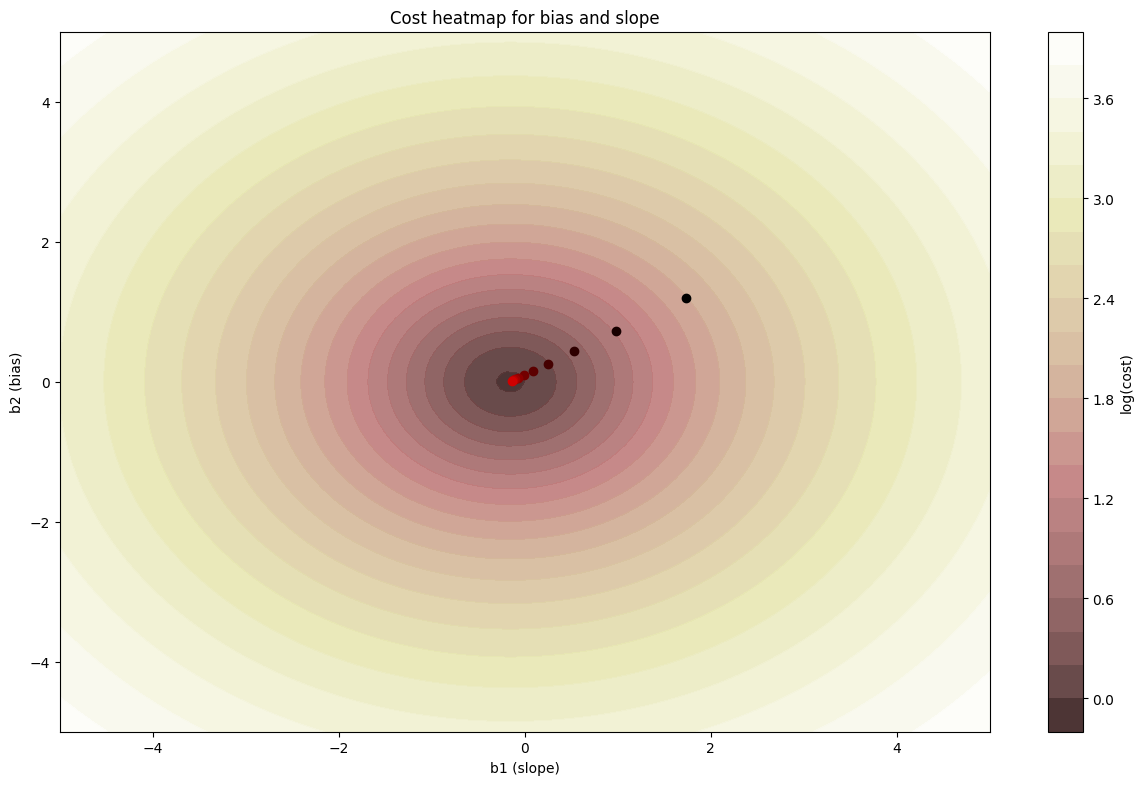

In [87]:
# b)
X = bank_df.annual_inc.values.reshape(-1,1)[:100]
y = bank_df.dti.values.reshape(-1,1)[:100]

X=standardize(X)
y_shifted=standardize(y_shifted)
X_1 = np.c_[X,np.ones((100,1))]
b = [[3],[2]]
lr = 0.2
arr_b = []

for i in range(10):
    b = gradient_descent_step(b, X_1, y_shifted, lr)
    arr_b.append(b) 
    
#Bias Part
nb_of_bs = 101 # compute the cost nb_of_bs times in each dimension
b1 = np.linspace(-5, 5, num=nb_of_bs) # slope coefficient
b2 = np.linspace(-5, 5, num=nb_of_bs) # bias
b_x, b_y = np.meshgrid(b1, b2) # generate grid
cost_arr_2d = np.zeros((nb_of_bs, nb_of_bs)) # initialize cost matrix

# Fill the cost matrix for each combination of coefficients
for i in range(nb_of_bs):
    for j in range(nb_of_bs):
        cost_arr_2d[i,j] = cost(predict(np.array([[b_x[i,j]], [b_y[i,j]]]), X_1) , y_shifted)

plt.figure(figsize=(15,20)) 
plt.subplot(2,1,1)
plt.title("Cost heatmap for bias and slope")
print(arr_b[3][0][0])
print(best_b1)
plt.contourf(b_x, b_y, np.log(cost_arr_2d), 20, alpha=0.9, cmap=cm.pink)
cbar = plt.colorbar()

for i in range (10):
    plt.scatter(arr_b[i][0][0], arr_b[i][1][0],color = [[0.09*i,0,0]])
    
cbar.ax.set_ylabel('log(cost)')
plt.xlabel("b1 (slope)")
plt.ylabel("b2 (bias)")
plt.show()

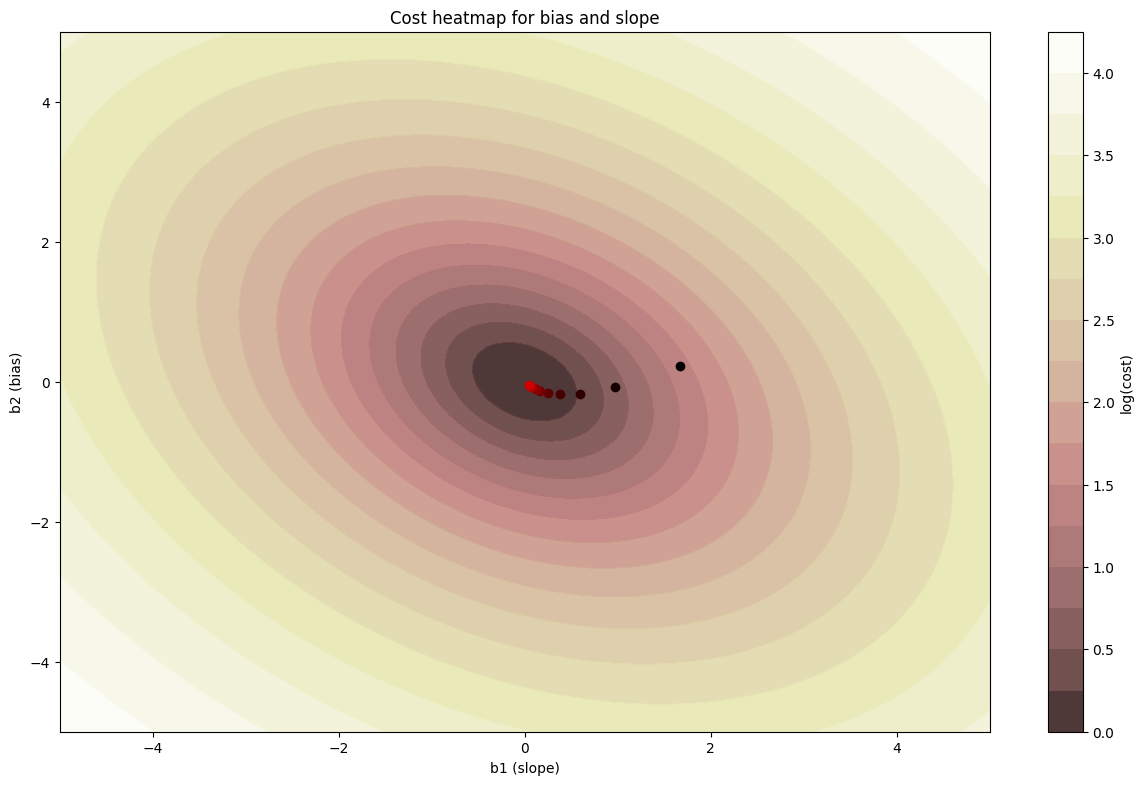

In [62]:
# c)
X1 = bank_df.annual_inc.values.reshape(-1,1)[:100]
X2 = bank_df.loan_amnt.values.reshape(-1,1)[:100]
X_all = np.hstack((X1,X2))
# print(X_all)

X_all=standardize(X_all)
y_shifted=standardize(y_shifted)
b = [[3],[1]]
lr = 0.2
arr_b = []

for i in range(10):
    b = gradient_descent_step(b, X_all, y_shifted, lr)
    arr_b.append(b) 
    
#Bias Part
nb_of_bs = 101 # compute the cost nb_of_bs times in each dimension
b1 = np.linspace(-5, 5, num=nb_of_bs) # slope coefficient
b2 = np.linspace(-5, 5, num=nb_of_bs) # bias
b_x, b_y = np.meshgrid(b1, b2) # generate grid
cost_arr_2d = np.zeros((nb_of_bs, nb_of_bs)) # initialize cost matrix

# Fill the cost matrix for each combination of coefficients
for i in range(nb_of_bs):
    for j in range(nb_of_bs):
        cost_arr_2d[i,j] = cost(predict(np.array([[b_x[i,j]], [b_y[i,j]]]), X_all) , y_shifted)

plt.figure(figsize=(15,20)) 
plt.subplot(2,1,1)
plt.title("Cost heatmap for bias and slope")
# print(arr_b[3][0][0])
# print(best_b1)
plt.contourf(b_x, b_y, np.log(cost_arr_2d), 20, alpha=0.9, cmap=cm.pink)
cbar = plt.colorbar()

for i in range (10):
    plt.scatter(arr_b[i][0][0], arr_b[i][1][0],color = [[0.09*i,0,0]])
    
cbar.ax.set_ylabel('log(cost)')
plt.xlabel("b1 (slope)")
plt.ylabel("b2 (bias)")
plt.show()



## Summary:
Learning rate of gradient descent determines the step size of each iteration while moving to minimum of cost function. We can observe that the smaller is learning rate the points are having smaller distance between them, and the higher the rate the higher distance is between those points. Iterations stops when function is near-flat for this we need the precision value.

3
0.0


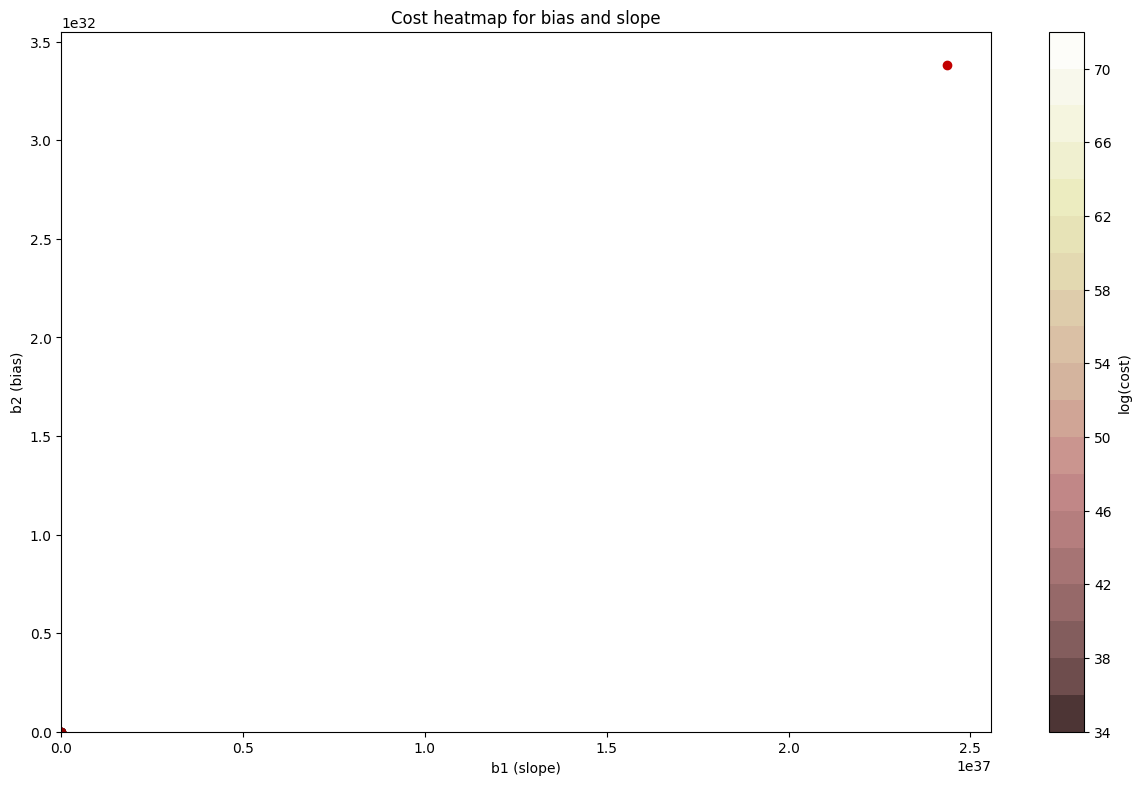

In [83]:
# # d) without standardization:
X = bank_df.annual_inc.values.reshape(-1,1)[:100]
y = bank_df.dti.values.reshape(-1,1)[:100]
y_shifted = y+1e6
X_1 = np.c_[X,np.ones((100,1))]
b = [[3],[2]]
lr = 0.2
arr_b = []

for i in range(10):
    arr_b.append(b) 
    b = gradient_descent_step(b, X_1, y, lr)
    
#Bias Part
nb_of_bs = 201 # compute the cost nb_of_bs times in each dimension
b1 = np.linspace(-5e5, 2e5, num=nb_of_bs) # slope coefficient
b2 = np.linspace(-1e15, 3e15, num=nb_of_bs) # bias
b_x, b_y = np.meshgrid(b1, b2) # generate grid
cost_arr_2d = np.zeros((nb_of_bs, nb_of_bs)) # initialize cost matrix

# Fill the cost matrix for each combination of coefficients
for i in range(nb_of_bs):
    for j in range(nb_of_bs):
        cost_arr_2d[i,j] = cost(predict(np.array([[b_x[i,j]], [b_y[i,j]]]), X_1) , y_shifted)

plt.figure(figsize=(15,20)) 
plt.subplot(2,1,1)
plt.title("Cost heatmap for bias and slope")
print(arr_b[0][0][0])
print(best_b1)
plt.contourf(b_x, b_y, np.log(cost_arr_2d), 20, alpha=0.9, cmap=cm.pink)
cbar = plt.colorbar()
for i in range (5):
    plt.scatter(arr_b[i][0][0], arr_b[i][1][0],color = [[0.19*i,0,0]])
    
cbar.ax.set_ylabel('log(cost)')
plt.xlabel("b1 (slope)")
plt.ylabel("b2 (bias)")
plt.show()

As we can see without standarization points are enormously distant from each other just as in the basic version of the assignment.

In [ ]:
#  Add f.e. regularisation, feautures selection, non-parametric regression, etc.